In [ ]:
# Goals for this notebook
# - create version of data with churn column                            (done)
# - analyze 'verification' and 'defect' tab & responsible party columns (done)
# - graph out and count the reasons and types of returns                (done)
# - create relational matrix heatmap to find out which other factors are correlated with churn
# - go through full data sheet and figure out not churned devices, do similar heatmap for non churn params

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [4]:
# load the excel sheet into a Dataframe
xls_file = pd.ExcelFile("./UW_Churn_Pred_Data.xls")
print(f"Sheet Names: {xls_file.sheet_names}")

Sheet Names: ['Data', 'Legend', 'N10', 'B30 Pro', 'Data Before Feb 13']


In [6]:
# Create a dataframe of each sheet
data_df = pd.read_excel(xls_file, sheet_name="Data")
beforeFeb_df = pd.read_excel(xls_file, sheet_name="Data Before Feb 13")

In [9]:
# In beforeFeb_df, look at 'Type' column, if 'return' then look ta 'Defect / Damage Type' column and get the reason
# - also look at 'Product/Model #' column and get counts of each one that was a return
# In data_df, can do the same steps, but its named 'Model'

# Step 1: filter data frame to only have rows where the 'Type' column is 'return'
#print(beforeFeb_df.head())
beforeFeb_returns_df = beforeFeb_df[beforeFeb_df['Type'] == 'Return']
data_returns_df = data_df[data_df['Type'] == 'Return']


In [17]:
# Step 2: for each row, get the 'Defect / Damage Type' value & keep a count
# have a dictionary of the model types and counts
# have a dictionary of the defect types and counts
model_counts = {}
defect_counts = {}
for row in beforeFeb_returns_df.itertuples():
    # row[2] = model type
    if row[2] not in model_counts:
        model_counts[row[2]] = 1
    else:
        model_counts[row[2]] += 1
    
    # row[9] = defect type
    if row[9] not in defect_counts:
        defect_counts[row[9]] = 1
    else:
        defect_counts[row[9]] += 1

for row in data_returns_df.itertuples():
    # row[2] = model type
    if row[2] not in model_counts:
        model_counts[row[2]] = 1
    else:
        model_counts[row[2]] += 1
    
    # row[6] = defect type
    if row[6] not in defect_counts:
        defect_counts[row[6]] = 1
    else:
        defect_counts[row[6]] += 1

print(f"Model Counts: {model_counts}")
print(f"Defect Counts: {defect_counts}")

Model Counts: {'N10': 127, 'B30 Pro': 209, 'B30': 10, 'B20': 244, 'A23 Plus': 976, 'Earbuds A': 42, 'A15': 370, 'Earbuds B': 32, 'B15': 103, 'A25': 236, 'B10': 91, 'A23Plus': 13, 'A11L': 10, 'F4L': 13, 'B20 TPU': 29, 'Buds B': 4, nan: 1, ' A23 Plus': 7, 'A23 ': 1, 'Buds A': 2, 'X6P': 1, 'A9L': 2, 'A23 PLus': 3, 'A25 ': 4, 'B30 ': 1, 'A10L': 3, 'EArbuds A': 1}
Defect Counts: {'No defect': 2384, 'Device cannot power on': 3, 'Display or TP': 37, nan: 5, 'LCD': 1, 'Microphone/Speaker': 13, 'Hardware': 73, 'Receive/Transmit/Antenna': 1, 'Battery ': 1, 'Power (non battery)': 14, 'Software': 1, 'Camera': 2}


In [18]:
# Get total count of defects (from data before feb 13, and Data sheets)
num_defects = 0
for value in defect_counts.values():
    num_defects += value

print(num_defects)

2535


In [23]:
# Sort the dictionaries
# - have 'model_counts' and 'defect_counts' dictionaries
# - sort them by value
sorted_model_counts = {k: v for k, v in sorted(model_counts.items(), key=lambda item: item[1], reverse=True)}
print(sorted_model_counts)
sorted_defect_counts = {k: v for k, v in sorted(defect_counts.items(), key=lambda item: item[1], reverse=True)}
print(sorted_defect_counts)

{'A23 Plus': 976, 'A15': 370, 'B20': 244, 'A25': 236, 'B30 Pro': 209, 'N10': 127, 'B15': 103, 'B10': 91, 'Earbuds A': 42, 'Earbuds B': 32, 'B20 TPU': 29, 'A23Plus': 13, 'F4L': 13, 'B30': 10, 'A11L': 10, ' A23 Plus': 7, 'Buds B': 4, 'A25 ': 4, 'A23 PLus': 3, 'A10L': 3, 'Buds A': 2, 'A9L': 2, nan: 1, 'A23 ': 1, 'X6P': 1, 'B30 ': 1, 'EArbuds A': 1}
{'No defect': 2384, 'Hardware': 73, 'Display or TP': 37, 'Power (non battery)': 14, 'Microphone/Speaker': 13, nan: 5, 'Device cannot power on': 3, 'Camera': 2, 'LCD': 1, 'Receive/Transmit/Antenna': 1, 'Battery ': 1, 'Software': 1}


AttributeError: 'tuple' object has no attribute 'title'

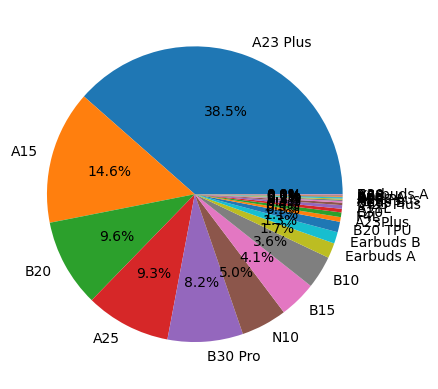

In [24]:
# Create pie charts of the dictionaries
plt = plt.pie(sorted_model_counts.values(), labels=sorted_model_counts.keys(), autopct='%1.1f%%')
plt = plt.title("Models Sold")
plt = plt.show()

In [ ]:
# Other sheets
n10_df = pd.read_excel(xls_file, sheet_name="N10")
b30Pro_df = pd.read_excel(xls_file, sheet_name="B30 Pro")